<a href="https://colab.research.google.com/github/monindew/hongongmachine/blob/main/iamdo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
filename = list(files.upload().keys())[0]

Saving spam.csv to spam.csv


In [2]:
import pandas as pd
sms = pd.read_csv(filename, encoding = 'latin - 1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms.drop(sms.columns[[2,3,4]], axis=1, inplace=True)
sms.rename(columns = {'v1':'target', 'v2':'message'}, inplace=True)
sms.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
spam_words = ' '.join(sms.loc[sms['target'] == 'spam']['message'])

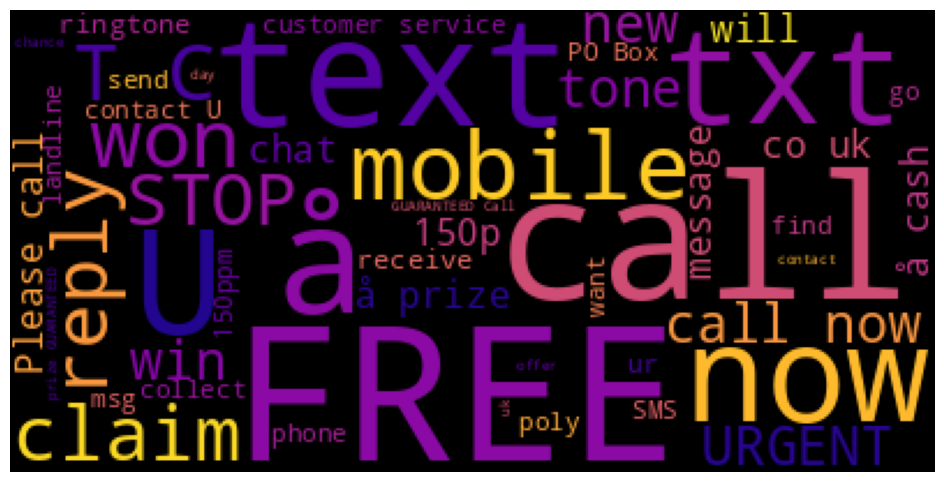

In [7]:
spam_wc = WordCloud(colormap='plasma', max_words=50).generate(spam_words)
plt.figure(figsize=(24,6))
plt.axis('off')
plt.imshow(spam_wc)

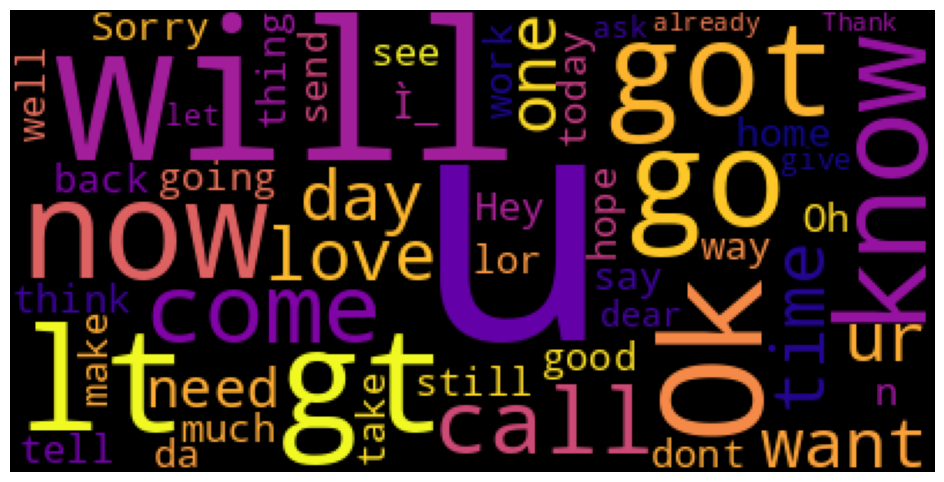

In [9]:
ham_words = ' '.join(sms.loc[sms['target'] == 'ham']['message'])
ham_wc = WordCloud(colormap='plasma', max_words=50).generate(ham_words)
plt.figure(figsize=(24,6))
plt.axis('off')
plt.imshow(ham_wc)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
X = sms["message"]
y = sms["target"]
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(X).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5014, 2500) (558, 2500) (5014,) (558,)


In [21]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(solver = 'liblinear')
LR_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [22]:
from sklearn.metrics import accuracy_score
y_pred = LR_model.predict(X_test)

In [23]:
print("Accuracy:{:.3f}".format(accuracy_score(y_test, y_pred)))

Accuracy:0.978


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
cm

array([[464,   1],
       [ 11,  82]])

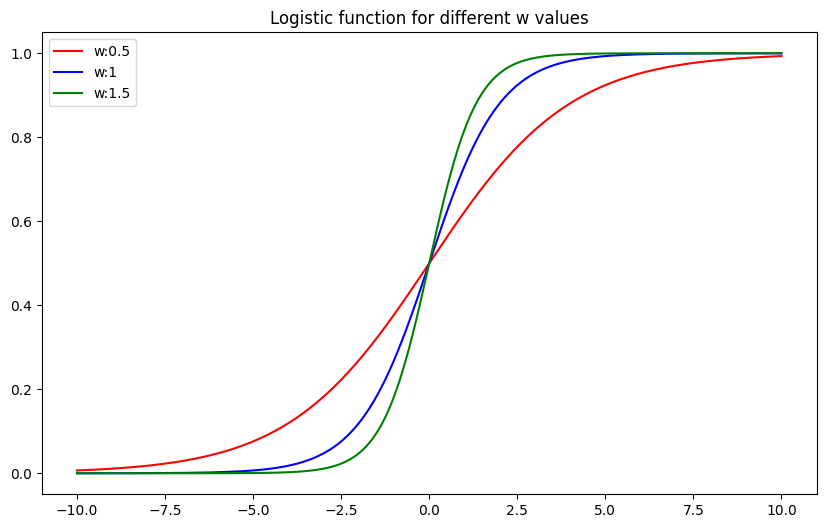

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(x, w, b=0):
  return 1/(1 + np.exp(-(w*x + b)))

x = np.linspace(-10,10,1000)


w_values = [0.5, 1, 1.5]
colors= ["red","blue","green"]

plt.figure(figsize=(10,6))
for w, color in zip(w_values, colors):
  y=logistic_function(x,w)
  plt.plot(x, y, color=color, label=f'w:{w}')

plt.title("Logistic function for different w values")
plt.legend()
plt.show()